In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"
})

In [3]:
masses = [
    11
]
couplings = [ -9.0 ]
# couplings = [ 0 ]

colormap_m = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(masses), np.max(masses)),
    plt.get_cmap(f'winter')
)

colormap_g = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(couplings), np.max(couplings)),
    plt.get_cmap(f'winter')
)

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]

In [4]:
runs = dict()
for m in masses:
    for g in couplings:
        try:
            key = f'm{m:04.1f}_g{g:+04.2f}'
    
            run = pd.read_csv(f'csv/{key}/index.csv')
            run['mass (Msun)'] = float(key[1:5])
            run['coupling'] = float(key[7:])
            # run['slices'] = [
            #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
            #     for model in run['slice']
            # ]
        
            runs[key] = run
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m11.0_g-9.00,	

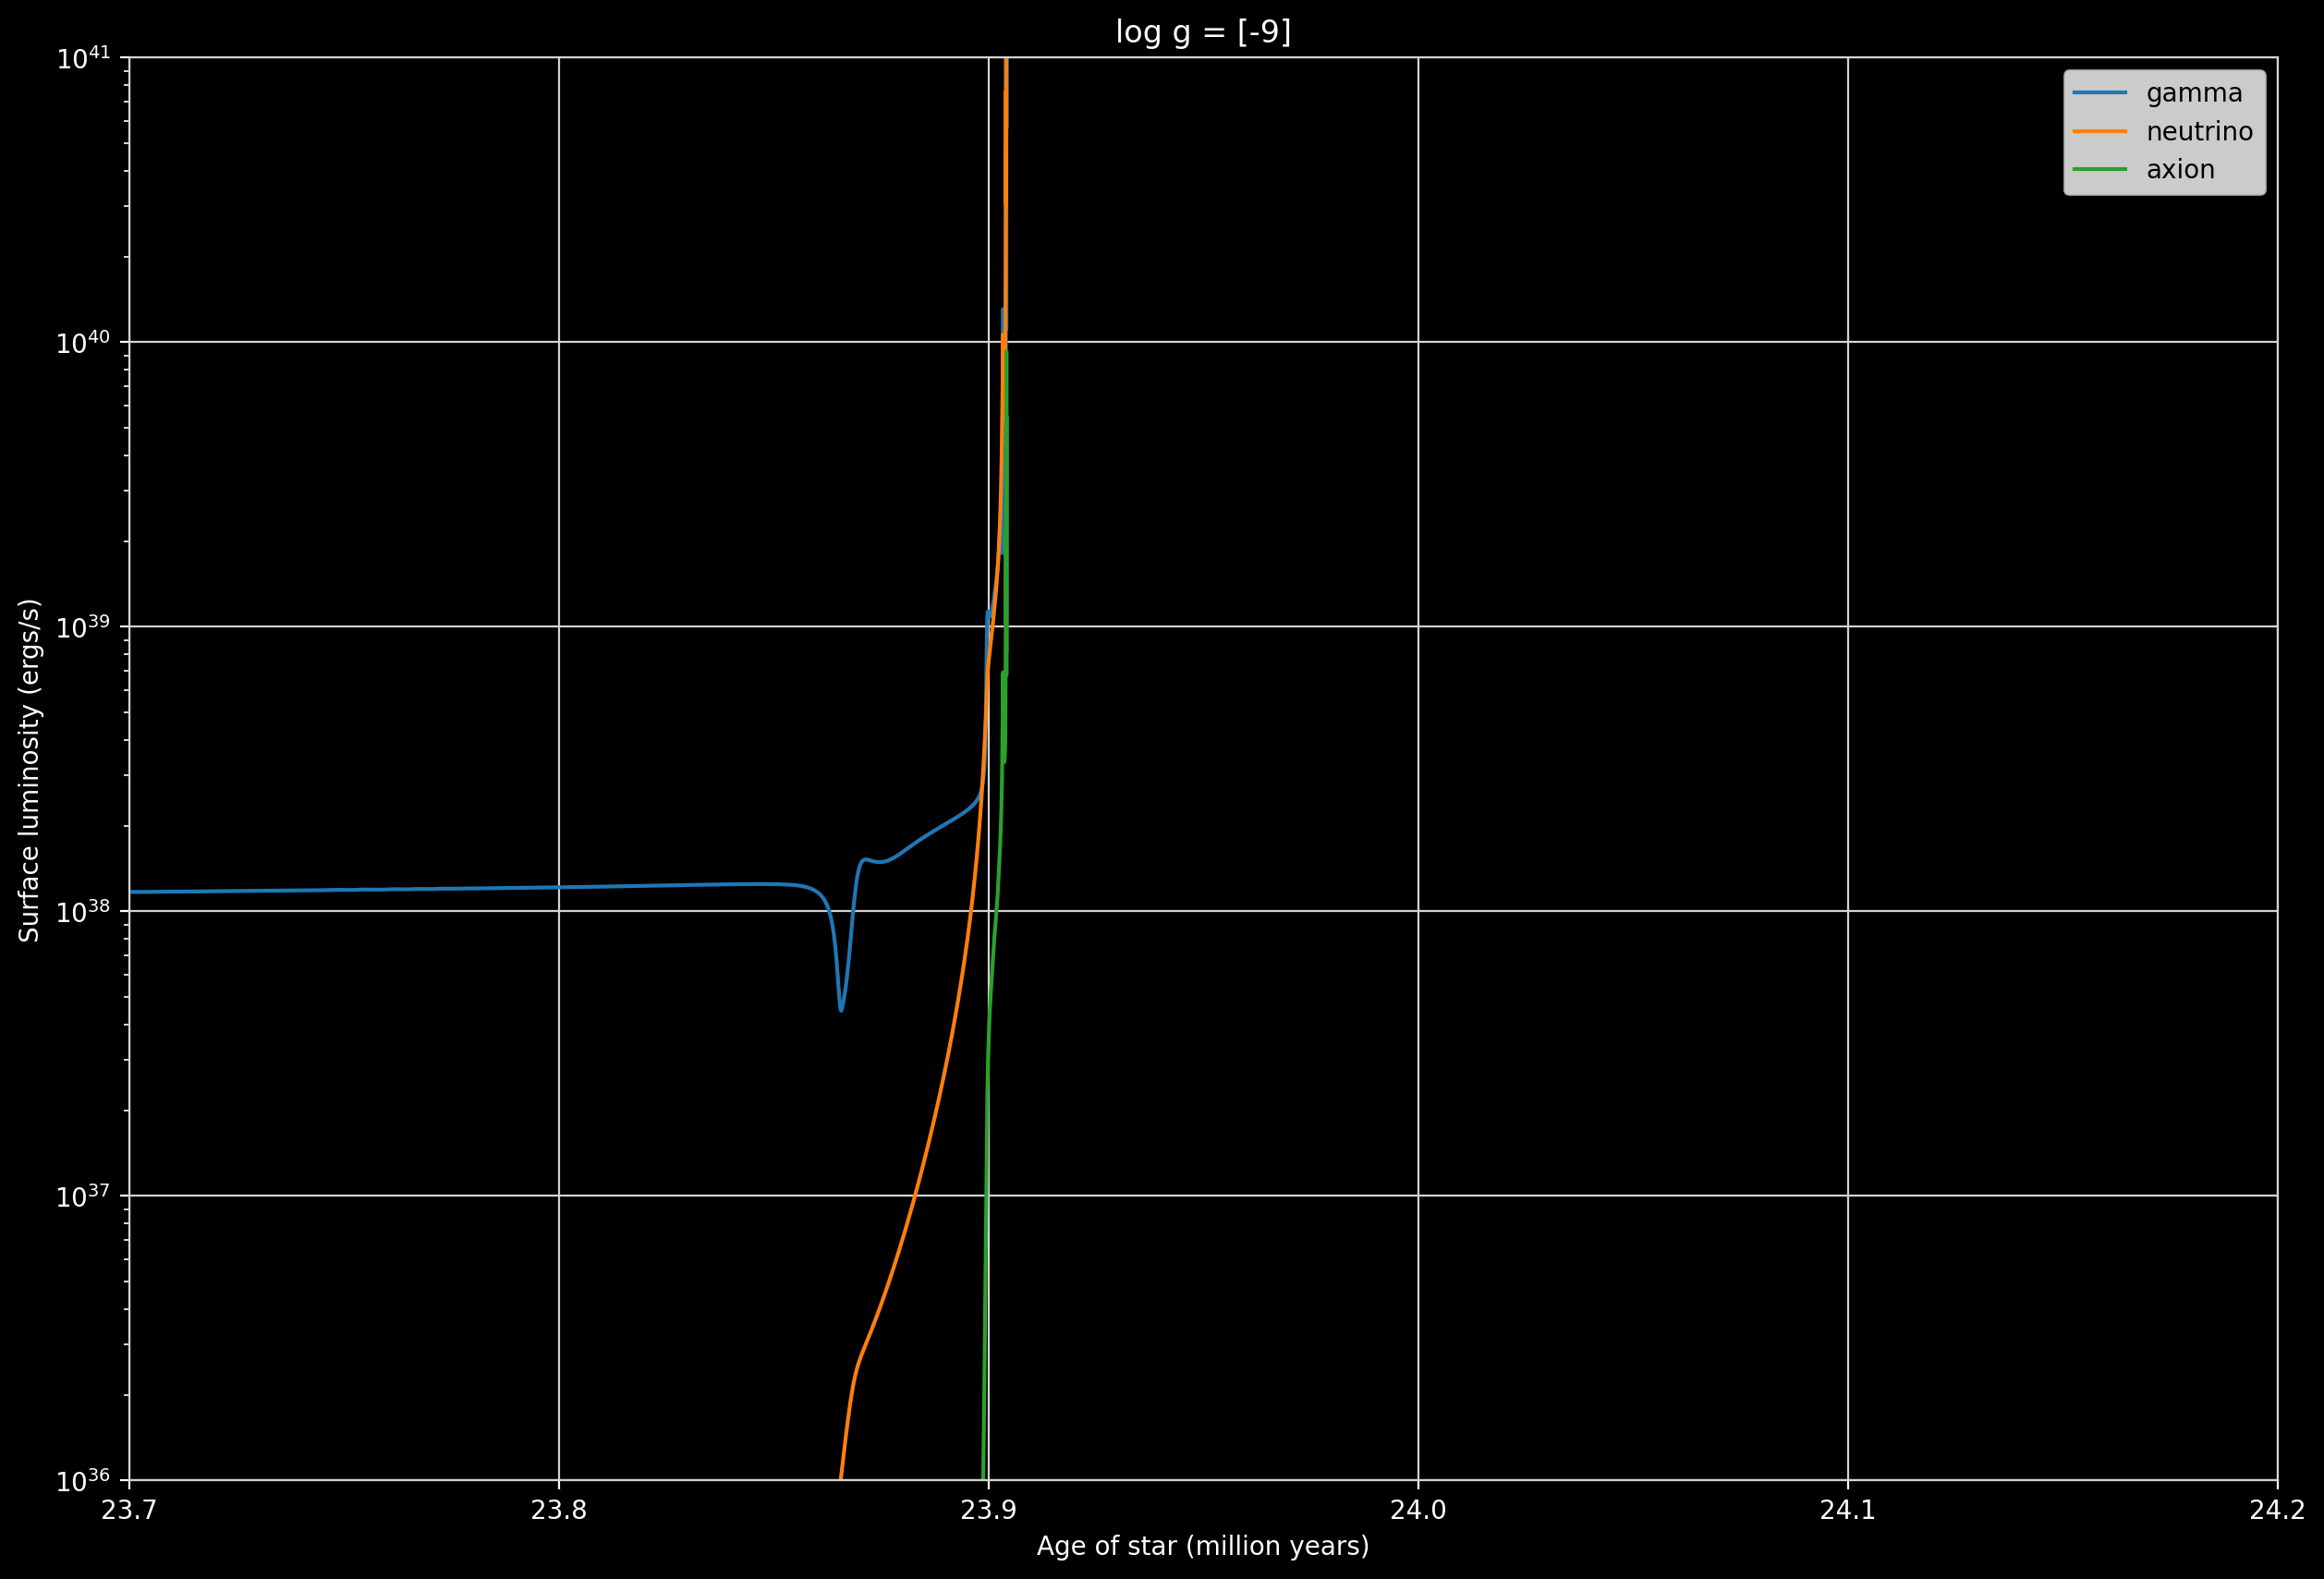

In [8]:
ax = plt.gca()
ax.set_facecolor('black')

G = [-9]

for (i, key) in enumerate(runs):
    run = runs[key]
    g = run['coupling'][0]
    m = run['mass (Msun)'][0]
    if g not in G: continue
    coupling = g
    mass = m
    T = np.array(run['core T (K)'])
    Lgamma = np.array(run['surface lum_gamma (ergs/s)'])
    Lneu = np.array(run['surface lum_neu (ergs/s)'])
    Laxion = np.array(run['surface lum_a (ergs/s)'])
    age = np.array(run['age (years)']) / 1e6
    slices = np.array(run['slice'])
    plt.plot(age, Lgamma, label='gamma')
    plt.plot(age, Lneu, label='neutrino')
    plt.plot(age, Laxion, label='axion')
    break

plt.legend()

plt.ylim(10e35, 10e40)
plt.xlim(23.7, 24.2)
plt.xlabel("Age of star (million years)")
plt.ylabel("Surface luminosity (ergs/s)")
# plt.gca().set_xscale('log')
plt.title(f"log g = {G}", c='white')
plt.grid()
plt.gca().set_yscale('log')